### Importing Packages and defining necessary functions

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_boston
import seaborn as sbn

In [3]:
pd.set_option('display.float_format','{:,.1f}'.format)

# Create a function to provide data exploratory summary
def df_ex(df,head_size = 5, show_info = True):
    '''print data frame exploratory summary statistics to screen'''
    display(df.shape)
    display(df.head(head_size))
    if show_info:
        display(df.info())

#Step 1

###Loading in the Dataset

In [4]:
#import the dataset
#boston_full = pd.read_csv("/content/drive/MyDrive/Colab Datasets/Data Mining/BostonHousingData.csv") #(506,13)

boston_dataset = load_boston()
boston_full = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names) #(506, 13)

boston_full['MEDV'] = boston_dataset.target

boston_full = boston_full.drop('B', axis=1)
print(boston_full)

     CRIM   ZN  INDUS  CHAS  NOX  RM  AGE  DIS  RAD   TAX  PTRATIO  LSTAT  \
0     0.0 18.0    2.3   0.0  0.5 6.6 65.2  4.1  1.0 296.0     15.3    5.0   
1     0.0  0.0    7.1   0.0  0.5 6.4 78.9  5.0  2.0 242.0     17.8    9.1   
2     0.0  0.0    7.1   0.0  0.5 7.2 61.1  5.0  2.0 242.0     17.8    4.0   
3     0.0  0.0    2.2   0.0  0.5 7.0 45.8  6.1  3.0 222.0     18.7    2.9   
4     0.1  0.0    2.2   0.0  0.5 7.1 54.2  6.1  3.0 222.0     18.7    5.3   
..    ...  ...    ...   ...  ...  ..  ...  ...  ...   ...      ...    ...   
501   0.1  0.0   11.9   0.0  0.6 6.6 69.1  2.5  1.0 273.0     21.0    9.7   
502   0.0  0.0   11.9   0.0  0.6 6.1 76.7  2.3  1.0 273.0     21.0    9.1   
503   0.1  0.0   11.9   0.0  0.6 7.0 91.0  2.2  1.0 273.0     21.0    5.6   
504   0.1  0.0   11.9   0.0  0.6 6.8 89.3  2.4  1.0 273.0     21.0    6.5   
505   0.0  0.0   11.9   0.0  0.6 6.0 80.8  2.5  1.0 273.0     21.0    7.9   

     MEDV  
0    24.0  
1    21.6  
2    34.7  
3    33.4  
4    36.2  
.. 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

#EDA

In [5]:
boston_full.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6,11.4,11.1,0.1,0.6,6.3,68.6,3.8,9.5,408.2,18.5,12.7,22.5
std,8.6,23.3,6.9,0.3,0.1,0.7,28.1,2.1,8.7,168.5,2.2,7.1,9.2
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.1,1.0,187.0,12.6,1.7,5.0
25%,0.1,0.0,5.2,0.0,0.4,5.9,45.0,2.1,4.0,279.0,17.4,6.9,17.0
50%,0.3,0.0,9.7,0.0,0.5,6.2,77.5,3.2,5.0,330.0,19.1,11.4,21.2
75%,3.7,12.5,18.1,0.0,0.6,6.6,94.1,5.2,24.0,666.0,20.2,17.0,25.0
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,38.0,50.0


In [6]:
df_ex(boston_full)

(506, 13)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.0,18.0,2.3,0.0,0.5,6.6,65.2,4.1,1.0,296.0,15.3,5.0,24.0
1,0.0,0.0,7.1,0.0,0.5,6.4,78.9,5.0,2.0,242.0,17.8,9.1,21.6
2,0.0,0.0,7.1,0.0,0.5,7.2,61.1,5.0,2.0,242.0,17.8,4.0,34.7
3,0.0,0.0,2.2,0.0,0.5,7.0,45.8,6.1,3.0,222.0,18.7,2.9,33.4
4,0.1,0.0,2.2,0.0,0.5,7.1,54.2,6.1,3.0,222.0,18.7,5.3,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


None

In [7]:
boston_full.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.0,18.0,2.3,0.0,0.5,6.6,65.2,4.1,1.0,296.0,15.3,5.0,24.0
1,0.0,0.0,7.1,0.0,0.5,6.4,78.9,5.0,2.0,242.0,17.8,9.1,21.6
2,0.0,0.0,7.1,0.0,0.5,7.2,61.1,5.0,2.0,242.0,17.8,4.0,34.7
3,0.0,0.0,2.2,0.0,0.5,7.0,45.8,6.1,3.0,222.0,18.7,2.9,33.4
4,0.1,0.0,2.2,0.0,0.5,7.1,54.2,6.1,3.0,222.0,18.7,5.3,36.2


# Step 2

### Test, Train, and Split the dataset; and, apply a standard scaler

In [8]:
boston_target = boston_full["MEDV"]

In [9]:
#This is the test train split. boston is x, and boston_target is y
#I will have to decine y before this as "boston_target"
X_train, X_test, y_train, y_test = train_test_split(boston_full, boston_target, test_size=0.3, random_state=0)

In [10]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
141,1.6,0.0,21.9,0.0,0.6,5.0,100.0,1.4,4.0,437.0,21.2,34.4,14.4
272,0.1,20.0,7.0,0.0,0.5,6.5,58.7,3.9,3.0,223.0,18.6,7.7,24.4
135,0.6,0.0,21.9,0.0,0.6,6.3,98.2,2.1,4.0,437.0,21.2,17.0,18.1
298,0.1,70.0,2.2,0.0,0.4,6.3,20.1,7.8,5.0,358.0,14.8,5.0,22.5
122,0.1,0.0,25.6,0.0,0.6,6.0,92.9,2.1,2.0,188.0,19.1,17.9,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.3,0.0,7.4,0.0,0.5,5.7,74.3,4.7,5.0,287.0,19.6,11.7,18.5
192,0.1,45.0,3.4,0.0,0.4,7.2,26.3,6.5,5.0,398.0,15.2,2.9,36.4
117,0.2,0.0,10.0,0.0,0.5,6.0,82.6,2.7,6.0,432.0,17.8,10.3,19.2
47,0.2,0.0,6.9,0.0,0.4,6.0,85.5,5.7,3.0,233.0,17.9,18.8,16.6


In [11]:
X_train_drop = X_train.drop(['MEDV'], axis=1)
X_test_drop = X_test.drop(['MEDV'], axis=1)

In [12]:
scaler = StandardScaler() #defining the scaler variable. Scaler is like an action taking place on the data to normalize it
scaler.fit(X_train_drop) #Which is why it's similar to running a regression syntactically. We're fitting the standard scalar to the data.
X_train_scaled = scaler.transform(X_train_drop)
X_test_scaled = scaler.transform(X_test_drop)

You can see the mean and standard deviation using the built methods for the StandardScaler object

In [13]:
# Mean
print(scaler.mean_)

# Standard Deviation
print(scaler.scale_) 

[3.35828432e+00 1.18093220e+01 1.10787571e+01 6.49717514e-02
 5.56098305e-01 6.30842655e+00 6.89940678e+01 3.76245876e+00
 9.35310734e+00 4.01782486e+02 1.84734463e+01 1.24406497e+01]
[8.34141658e+00 2.36196246e+01 6.98393565e+00 2.46476009e-01
 1.15437239e-01 7.01016354e-01 2.79987983e+01 2.06473886e+00
 8.65974217e+00 1.70351284e+02 2.22166426e+00 7.06848020e+00]


# Step 3

Generate the K-means solution. 

Extract 2-10 k-means clusters using the variable set. Present the Variance-Accounted-For (VAF or R-square). Remember: the local optima problem is big for all the clustering and mixture models. So remember to run them from at least 50-100 random starts.

Use the training set only.
Always set.seed() for reproducibility of the code.
Run a for loop through different K values. At each iteration, save the necessary information you might need, such as VAF, cluster sizes, and cluster centroids.

In [14]:
#creating a dataframe for our results from the k - means clusters
k_value_results = pd.DataFrame(columns=['k', 'labels', 'centroids', 'cluster_sizes', 'vaf', 'Inertia/WCSS','varexp'])
sum_sq_distance = []

In [15]:
for k in range(2,12): #just a range of 10
    kmeans_model = KMeans(n_clusters=k, n_init=200, max_iter=300, tol=0.0001, verbose=0,random_state = 13511).fit(X_train_scaled) #learns/tries to identify. Starts at a random point and does the iteratoins on what datapoitns should be together based on euclidian distance. #fitting the kmeans model to our scaled x_train data
    kmeans_model.fit_predict(X_train_scaled) #predicting the fitted data. This will actually give you the labels 
    sum_sq_distance.append(kmeans_model.inertia_) #within-cluster sum of squares
    
    # Get the total sum of squares
    tss = np.sum(np.square(X_train_scaled - np.mean(X_train_scaled, axis=0)))

    # Get the within-cluster sum of squares
    wcss = kmeans_model.inertia_

    # Get the between-cluster sum of squares
    bss = tss - wcss

    # Get the variance accounted for by the clustering
    var_explained = bss / tss

    centroids = kmeans_model.cluster_centers_ #variable for our centroids
    labels = kmeans_model.labels_ #variable for our labels. Each instance is assigned to one of the five clusters and is given an index of the cluster it gets assigned to.
    cluster_sizes = np.bincount(labels) #Count number of occurrences of each value in array of non-negative ints
    
    centroids_dataframe = pd.DataFrame(data=centroids) #converting our centroids to a dataframe
    centroids_matrix = centroids_dataframe.values #converting our centroids to a matrix
    
    shap = (len(X_train_scaled),k) #creating a variable "shap," a tuple that is the length of both x_test_scaled and k
    cluster_matrix = np.zeros(shap) #creating an array of zeroes with the shape of the tuple defined in the variable "shap" and assigning it to "cluster_matrix"

    for i in range(k): #Using a for loop that iterates over the range of k (the number of clusters). Inside the loop, cluster_matrix is being updated.    
        cluster_matrix[kmeans_model.labels_ == i,i]=1.0 #the updating: using numpy's boolean indexing to set all the elements in cluster_matrix that have the same label as the current iteration to 1.0.

    predicted_data= np.dot(cluster_matrix,centroids_matrix) #dot product of the matrix to the centroids
    shap2 = (len(X_train_scaled)*k,1) #I don't know what this is for to be honest
    
    vaf = (np.corrcoef(predicted_data.ravel(), X_train_scaled.ravel())[0,1])**2
    #The coefficient of variance accounted for, which is the square of the correlation coefficient between predicted_data and original fit
    #.ravel() is flattening the array to a 1-D array from whatever n-dimensional array they started with
    
    k_value_results.at[k,'k'] = k
    k_value_results.at[k,'labels'] = labels
    k_value_results.at[k,'centroids'] = centroids
    k_value_results.at[k,'cluster_sizes'] = cluster_sizes
    k_value_results.at[k,'Inertia/WCSS'] = wcss
    k_value_results.at[k,'varexp'] = var_explained
    k_value_results.at[k,'vaf'] = vaf

In [16]:
k_value_results

,k,labels,centroids,cluster_sizes,vaf,Inertia/WCSS,varexp
2,2,"[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...","[[0.7230624580488351, -0.49997924404938904, 1....","[119, 235]",0.4,"2,688.1",0.4
3,3,"[1, 0, 1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, ...","[[-0.34972010732637765, -0.3550650527687201, -...","[149, 116, 89]",0.5,"2,194.8",0.5
4,4,"[1, 3, 1, 0, 3, 3, 0, 3, 1, 3, 0, 3, 0, 3, 3, ...","[[-0.39434264129505614, 1.397345687765975, -0....","[78, 109, 23, 144]",0.6,"1,908.2",0.6
5,5,"[4, 1, 4, 3, 4, 4, 1, 4, 2, 1, 1, 1, 3, 1, 1, ...","[[-0.18726758414624972, -0.2422716540992818, 0...","[23, 126, 84, 52, 69]",0.6,"1,658.4",0.6
6,6,"[3, 0, 3, 2, 3, 0, 0, 0, 1, 0, 5, 5, 2, 0, 0, ...","[[-0.3685267849619783, -0.33696110038223154, -...","[117, 84, 54, 37, 23, 39]",0.7,"1,471.4",0.7
7,7,"[2, 3, 2, 0, 2, 3, 3, 3, 1, 3, 5, 5, 0, 3, 3, ...","[[-0.39619727821463924, 2.013624230519525, -1....","[54, 78, 37, 117, 23, 39, 6]",0.7,"1,309.4",0.7
8,8,"[6, 5, 6, 2, 6, 0, 5, 0, 1, 0, 5, 4, 5, 5, 5, ...","[[-0.35282417049568976, -0.4483802020437534, -...","[64, 78, 40, 23, 35, 71, 37, 6]",0.7,"1,170.2",0.7
9,9,"[8, 1, 8, 5, 8, 2, 1, 2, 0, 2, 1, 3, 1, 1, 1, ...","[[0.7231761467377704, -0.4999792440493886, 1.0...","[78, 69, 65, 35, 23, 40, 6, 16, 22]",0.7,"1,089.2",0.7
10,10,"[2, 3, 2, 6, 2, 1, 3, 1, 0, 1, 3, 4, 3, 3, 3, ...","[[0.7231761467377704, -0.4999792440493886, 1.0...","[78, 65, 22, 69, 36, 16, 40, 6, 16, 6]",0.8,"1,010.4",0.8
11,11,"[7, 0, 7, 2, 7, 9, 0, 9, 8, 9, 6, 6, 0, 0, 0, ...","[[-0.38842123070096535, -0.01185075014389205, ...","[68, 67, 40, 15, 2, 17, 38, 22, 15, 64, 6]",0.8,948.8,0.8


# Steps 4 and 5

Perform a Scree test to choose appropriate number of k-means clusters. In other words, plot the VAFs you saved from the last step. Choose a K, based on the “elbow rule”.

If the "elbow" is smooth and present a couple of reasonable candidates of K, you may consider other factors, such as the business context, interpretability, and ease of interpretation. There’s no right answer, as long as you justify your decision.

Show the scree plot.

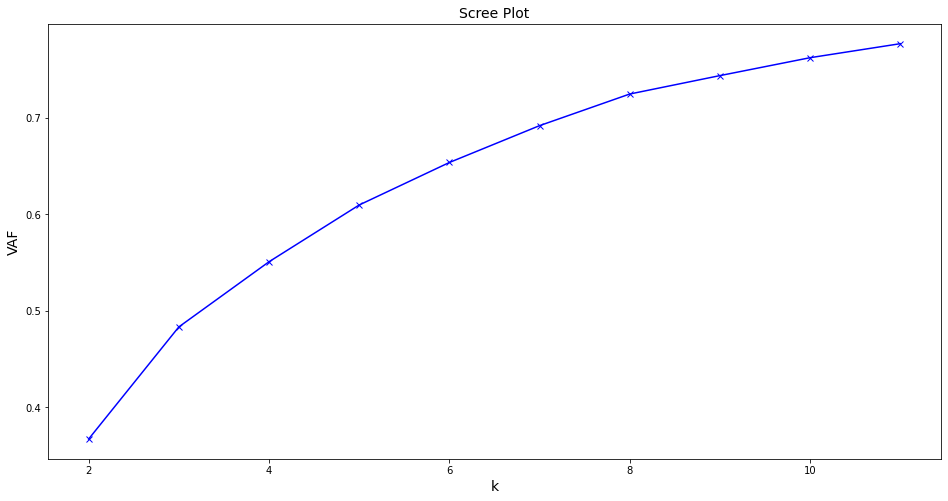

In [17]:
plt.figure(figsize=(16,8))
plt.plot(k_value_results['k'], k_value_results['vaf'], 'bx-')
plt.xlabel('k')
plt.ylabel('VAF')
plt.title('Scree Plot')
plt.show()

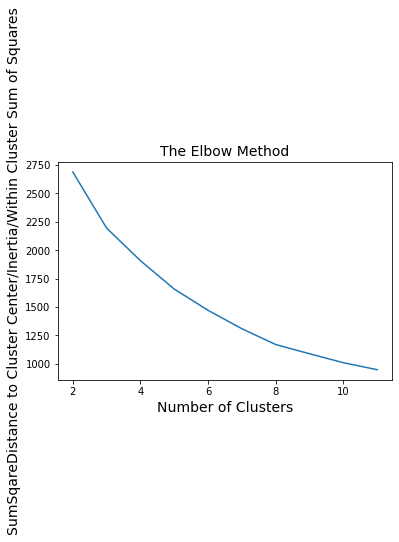

In [18]:
plt.plot(range(2, 12), sum_sq_distance)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SumSqareDistance to Cluster Center/Inertia/Within Cluster Sum of Squares')
plt.show()

#### Interpretation of SCREE and Elbow Plot: 

Both plots display significantly smooth curves. From a business perspective, we would want to avoid clustering beyond 5 clusters for the most part. 

However, we can also look at the overall change between clusters as another method to narrow down our choices

In [19]:
#create rate of change
#Calculate the slope between the current point and the next point for all metrics
#Creating a separate dataframe to reset the index in order for the plot's x-axis to render correctly without affecting the rest of the code below
k_value_results_graph = k_value_results
k_value_results_graph['Rate of Change_Inertia/WCSS'] = (k_value_results_graph['Inertia/WCSS'].diff() / k_value_results_graph['k'].diff())
k_value_results_graph['Rate of Change_VAF'] = (k_value_results_graph['varexp'].diff() / k_value_results_graph['k'].diff())
k_value_results_graph = k_value_results_graph.fillna(value=0).reset_index(drop=True)
k_value_results_graph

,k,labels,centroids,cluster_sizes,vaf,Inertia/WCSS,varexp,Rate of Change_Inertia/WCSS,Rate of Change_VAF
0,2,"[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...","[[0.7230624580488351, -0.49997924404938904, 1....","[119, 235]",0.4,"2,688.1",0.4,0.0,0.0
1,3,"[1, 0, 1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, ...","[[-0.34972010732637765, -0.3550650527687201, -...","[149, 116, 89]",0.5,"2,194.8",0.5,-493.3,0.1
2,4,"[1, 3, 1, 0, 3, 3, 0, 3, 1, 3, 0, 3, 0, 3, 3, ...","[[-0.39434264129505614, 1.397345687765975, -0....","[78, 109, 23, 144]",0.6,"1,908.2",0.6,-286.6,0.1
3,5,"[4, 1, 4, 3, 4, 4, 1, 4, 2, 1, 1, 1, 3, 1, 1, ...","[[-0.18726758414624972, -0.2422716540992818, 0...","[23, 126, 84, 52, 69]",0.6,"1,658.4",0.6,-249.8,0.1
4,6,"[3, 0, 3, 2, 3, 0, 0, 0, 1, 0, 5, 5, 2, 0, 0, ...","[[-0.3685267849619783, -0.33696110038223154, -...","[117, 84, 54, 37, 23, 39]",0.7,"1,471.4",0.7,-187.0,0.0
5,7,"[2, 3, 2, 0, 2, 3, 3, 3, 1, 3, 5, 5, 0, 3, 3, ...","[[-0.39619727821463924, 2.013624230519525, -1....","[54, 78, 37, 117, 23, 39, 6]",0.7,"1,309.4",0.7,-162.0,0.0
6,8,"[6, 5, 6, 2, 6, 0, 5, 0, 1, 0, 5, 4, 5, 5, 5, ...","[[-0.35282417049568976, -0.4483802020437534, -...","[64, 78, 40, 23, 35, 71, 37, 6]",0.7,"1,170.2",0.7,-139.2,0.0
7,9,"[8, 1, 8, 5, 8, 2, 1, 2, 0, 2, 1, 3, 1, 1, 1, ...","[[0.7231761467377704, -0.4999792440493886, 1.0...","[78, 69, 65, 35, 23, 40, 6, 16, 22]",0.7,"1,089.2",0.7,-81.0,0.0
8,10,"[2, 3, 2, 6, 2, 1, 3, 1, 0, 1, 3, 4, 3, 3, 3, ...","[[0.7231761467377704, -0.4999792440493886, 1.0...","[78, 65, 22, 69, 36, 16, 40, 6, 16, 6]",0.8,"1,010.4",0.8,-78.8,0.0
9,11,"[7, 0, 7, 2, 7, 9, 0, 9, 8, 9, 6, 6, 0, 0, 0, ...","[[-0.38842123070096535, -0.01185075014389205, ...","[68, 67, 40, 15, 2, 17, 38, 22, 15, 64, 6]",0.8,948.8,0.8,-61.6,0.0


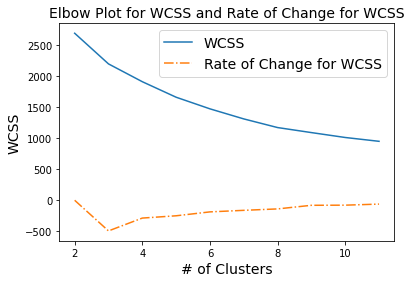

In [20]:
#plot elbow based on WCSS
plt.plot(k_value_results_graph['k'], k_value_results_graph['Inertia/WCSS'], label='WCSS')
plt.plot(k_value_results_graph['k'], k_value_results_graph['Rate of Change_Inertia/WCSS'], '-.', label='Rate of Change for WCSS')

plt.xlabel("# of Clusters") 
plt.ylabel("WCSS")
plt.title('Elbow Plot for WCSS and Rate of Change for WCSS')
plt.legend(loc="upper right")
plt.show()

# Explanation of Results

From our rate of change, 3 or 4 clusters looks like the best options to test. We will therefore retain k = 3 and k = 4 for our next steps

# Step 6

Choose 1 K-means solution (the best K from the last step) to retain from the many solutions that you have generated

* a. Use the criteria of VAF.
* b. Interpretability of the segments
* c. Doing well in Test. For the Test, use the centers (means) generated from the training set k-means solution (from step 3), as the starting point for performing k-means in the test set. Use VAF and relative cluster sizes as measures of stability.

Run Kmeans  on the test data set with the centers of the clusters from the train data solution as a starting point. Show the VAFs, cluster sizes, and centroids of both the training set and test set at the best K. 

Compare and interpret. A good selection of K should be at the “elbow” and presents a decent level of stability (VAF, centroids, and cluster sizes should be similar/unchanged between train and test). Does your model demonstrate these qualities?

In [21]:
#creating a dataframe for our results from the k - means clusters results for the test
k_value_test_results = pd.DataFrame(columns=['k', 'labels', 'centroids', 'cluster_sizes', 'vaf'])

In [22]:
for k in [3,4]:
    initial_centroids = k_value_results.at[k,'centroids'] #using the chosen centroids from the train set
    kmeans_model_test = KMeans(n_clusters=k, init=initial_centroids, n_init=1, max_iter=300, tol=0.0001, verbose=0,random_state = 13511).fit(X_test_scaled) #initializing the kmeans algorithm on the test data
    kmeans_model_test.fit_predict(X_test_scaled) #running the prediction

    centroids = kmeans_model_test.cluster_centers_ #new centroids
    labels = kmeans_model_test.labels_ #Forget what labels returns
    cluster_sizes = np.bincount(labels) # size of each "bin" or cluster
    
    centroids_dataframe = pd.DataFrame(data=centroids) # creating a dataframe of the centroids
    centroids_matrix = centroids_dataframe.values # creating a matrix from the dataframe
    
    #14 through #23 I think calculates the variance accounted for
    shap = (len(X_test_scaled),k) #creating a variable "shap," a tuple that is the length of both x_test_scaled and k
    cluster_matrix = np.zeros(shap) #creating an array of zeroes with the shape of the tuple defined in the variable "shap" and assigning it to "cluster_matrix"

    for i in range(k): #Using a for loop that iterates over the range of k (the number of clusters). Inside the loop, cluster_matrix is being updated.    
        cluster_matrix[kmeans_model_test.labels_ == i,i]=1.0 #the updating: using numpy's boolean indexing to set all the elements in cluster_matrix that have the same label as the current iteration to 1.0.

    predicted_data= np.dot(cluster_matrix,centroids_matrix) #using numpy's dot product function to calculate the dot product of the cluster_matrix and centroids_matrix. 
    shap2 = (len(X_test_scaled)*k,1) #A tuple of the length of X_test_scaled multiplied by k, and 1. Why are we doing this?
    
    vaf = (np.corrcoef(predicted_data.ravel(), X_test_scaled.ravel())[0,1])**2 
    #The coefficient of variance accounted for, which is the square of the correlation coefficient between predicted_data and X_test_scale
    #.ravel() is flattening the array to a 1-D array from whatever n-dimensional array they started with
    
    k_value_test_results.at[k,'k'] = k
    k_value_test_results.at[k,'labels'] = labels
    k_value_test_results.at[k,'centroids'] = centroids
    k_value_test_results.at[k,'cluster_sizes'] = cluster_sizes
    k_value_test_results.at[k,'vaf'] = vaf
    
    print('\nFOR K =',k) 
    print('\nCenters for the test data clusters are: ') 
    print(centroids.T)
    print('\nCenters for the original clusters are: ') 
    print(initial_centroids.T)
    print("\nThe test cluster proportions are", np.bincount(labels)/len(labels))
    print("\nThe original cluster proportions are", np.bincount(k_value_results.at[k,'labels'])/len(k_value_results.at[k,'labels']))
    print('\nVAF for the test data is:') 
    print(vaf)
    print('\nVAF for the original data is:') 
    print(k_value_results.at[k,'vaf'])


FOR K = 3

Centers for the test data clusters are: 
[[-0.36304869  1.09505486 -0.3919585 ]
 [-0.40834046 -0.49997924  1.70314794]
 [-0.27240246  1.06621042 -1.01251644]
 [ 0.00331765  0.15039624  0.03692985]
 [-0.36742125  1.07332518 -1.1414746 ]
 [-0.00406211 -0.63394548  0.52587578]
 [-0.12310169  0.79062481 -1.36889451]
 [ 0.132177   -0.91307074  1.58075077]
 [-0.53914963  1.37322687 -0.54972939]
 [-0.47135332  1.37143479 -0.4520348 ]
 [-0.14262613  0.53279721 -0.7165641 ]
 [-0.21414448  1.07848188 -0.79129348]]

Centers for the original clusters are: 
[[-0.34972011  0.75152267 -0.39402623]
 [-0.35506505 -0.49997924  1.24609309]
 [-0.31602227  1.127346   -0.94027884]
 [ 0.09038028 -0.01877231 -0.12684353]
 [-0.23090774  1.13164915 -1.08838257]
 [ 0.06718379 -0.43803986  0.45845212]
 [ 0.18634163  0.78722225 -1.33800768]
 [-0.15006709 -0.82881073  1.33148362]
 [-0.56235922  1.18367738 -0.60129272]
 [-0.61671184  1.28796898 -0.64622851]
 [-0.1865205   0.60873993 -0.48114918]
 [-0.132

In [23]:
final_kmeans = k_value_results['labels'][4]
final_kmeans

array([1, 3, 1, 0, 3, 3, 0, 3, 1, 3, 0, 3, 0, 3, 3, 3, 1, 1, 0, 1, 1, 2,
       1, 1, 3, 3, 1, 0, 1, 1, 3, 3, 3, 0, 0, 0, 3, 1, 1, 3, 3, 3, 3, 3,
       0, 1, 3, 2, 3, 3, 3, 0, 1, 3, 1, 0, 1, 3, 3, 2, 1, 0, 3, 1, 1, 3,
       1, 3, 1, 2, 3, 1, 0, 2, 3, 3, 0, 3, 1, 3, 3, 0, 3, 3, 1, 3, 3, 3,
       2, 0, 1, 1, 0, 0, 3, 3, 0, 3, 1, 1, 1, 3, 1, 3, 1, 3, 3, 0, 0, 0,
       2, 0, 3, 1, 3, 1, 0, 1, 3, 3, 1, 0, 1, 3, 1, 1, 2, 3, 0, 0, 0, 3,
       1, 0, 3, 0, 2, 3, 0, 3, 2, 3, 1, 3, 3, 1, 1, 0, 2, 1, 3, 3, 3, 3,
       0, 1, 3, 3, 3, 0, 3, 1, 3, 1, 2, 3, 0, 3, 1, 1, 3, 3, 1, 3, 3, 1,
       0, 0, 1, 3, 3, 3, 2, 3, 1, 0, 0, 3, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3,
       1, 0, 3, 3, 3, 1, 3, 3, 3, 1, 0, 0, 3, 0, 2, 1, 1, 1, 3, 2, 0, 1,
       1, 0, 3, 0, 1, 3, 0, 1, 1, 3, 0, 0, 3, 3, 2, 0, 3, 1, 3, 1, 3, 0,
       3, 3, 0, 1, 1, 3, 0, 3, 1, 1, 3, 3, 2, 1, 1, 3, 3, 3, 0, 3, 3, 1,
       1, 1, 1, 1, 3, 0, 3, 3, 2, 0, 0, 1, 3, 3, 1, 1, 0, 3, 1, 1, 2, 1,
       3, 1, 0, 1, 1, 1, 0, 3, 3, 2, 2, 1, 3, 0, 3,

In [48]:
k_value_test_results

,k,labels,centroids,cluster_sizes,vaf
3,3,"[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, ...","[[-0.36304869163600684, -0.40834045959673526, ...","[76, 49, 27]",0.5
4,4,"[3, 1, 2, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 2, ...","[[-0.39219679197657126, 1.8109522098782078, -1...","[24, 44, 11, 73]",0.6


In [35]:
d = final_kmeans
df = pd.DataFrame(data=d)
df.value_counts()

3    144
1    109
0     78
2     23
dtype: int64

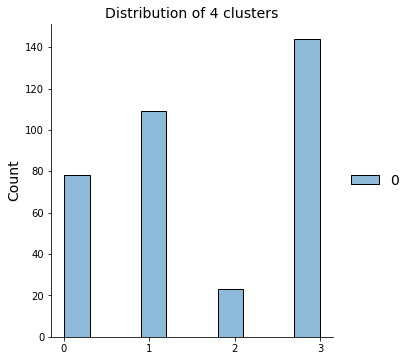

In [36]:
ax = sbn.displot(df).set(title='Distribution of 4 clusters')
ax.set(xticks=np.arange(0,4))

In [76]:
kmeans_model_4 = KMeans(n_clusters=4, n_init=200, max_iter=300, tol=0.0001, verbose=0,random_state = 13511).fit(X_train_scaled) #learns/tries to identify. Starts at a random point and does the iteratoins on what datapoitns should be together based on euclidian distance. #fitting the kmeans model to our scaled x_train data
kmeans_model_4.fit_predict(X_train_scaled) #predicting the fitted data. This will actually give you the labels 
sum_sq_distance.append(kmeans_model_4.inertia_) #within-cluster sum of squares

In [77]:
y_kmeans = kmeans_model_4.fit_predict(X_train_scaled)

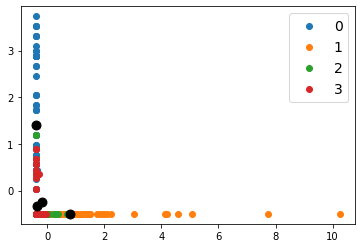

In [78]:
#Getting the Centroids
label = y_kmeans
centroids_4 = kmeans_model_4.cluster_centers_
u_labels = np.unique(y_kmeans)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X_train_scaled[label == i , 0] , X_train_scaled[label == i , 1] , label = i)
plt.scatter(centroids_4[:,0] , centroids_4[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [86]:
u_labels

array([0, 1, 2, 3], dtype=int32)

In [80]:
type(X_train_scaled)

numpy.ndarray

# Explanation of Results

Comparing our k=3 and k=4 results, we are going to move forward with k=4 for the following reasons:

* The VAF of the original data accounts for at least over 50%. While k = 3 looks promising for a number of reasons, it just hits the 50% mark in terms of variance accounted for on the test data, the VAF on the original data is merely 48%, which is too low 
* The stability of the clusters is realtively good, with the average amount of proportional change being ~4% across all clusters. The most significant changes relate to our largest cluster and our second-largest cluster, which was a surprise as we imagined the smaller cluster would potentially have more cluster instability between the train and test

# Step 7. 

### Generate 3-5 Gaussian Mixtures (GM) with seed function for reproducibility on scaled train dataset (same as the one used for KMeans).

In [68]:
mix_results = pd.DataFrame(columns=['n_components', 'means', 'aic', 'bic', 'labels'])
n_step = []
aic_score = []
bic_score = []

In [69]:
#kmeans_model_test = KMeans(n_clusters=k, init=initial_centroids, n_init=1, max_iter=300, tol=0.0001, verbose=0,random_state = 13511).fit(X_test_scaled) #initializing the kmeans algorithm on the test data

from sklearn.mixture import GaussianMixture

for n in range(2,7):
    mymixture = GaussianMixture(n_components = n, n_init = 100, max_iter = 300, tol = 0.0001, random_state = 13511)
    mixresults = mymixture.fit(X_train_scaled)
    
    labels = mymixture.predict(X_train_scaled)
    means = mixresults.means_
    aic = mixresults.aic(X_train_scaled)
    bic = mixresults.bic(X_train_scaled)
    mix_results.at[n,'n_components'] = np.float64(n)
    mix_results.at[n,'labels'] = labels
    mix_results.at[n,'means'] = means
    mix_results.at[n,'aic'] = aic
    mix_results.at[n,'bic'] = bic
    n_step.append(n)
    aic_score.append(mixresults.aic(X_train_scaled))
    bic_score.append(mixresults.bic(X_train_scaled))

    
    #print(mixresults.means_)
    #print(mixresults.aic)
    #print(mixresults.bic)
    #print(mymixture.predict(X_train_scaled))
    #print(mymixture.predict_proba(X_train_scaled))
    #print(mymixture.aic(X_train_scaled))
    #print(mymixture.bic(X_train_scaled))

In [40]:
mix_results

,n_components,means,aic,bic,labels
2,2.0,"[[-0.18726758414624967, -0.24227165409928186, ...","4,015.2","4,715.5","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,3.0,"[[1.0997286278504848, -0.49997924404938854, 1....","-2,136.8","-1,084.4","[1, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, ..."
4,4.0,"[[1.0997286278504848, -0.49997924404938854, 1....","-6,051.1","-4,646.5","[2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, ..."
5,5.0,"[[1.03233040470032, -0.4999792440493886, 1.068...","-6,824.5","-5,067.9","[2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, ..."
6,6.0,"[[-0.39491386830070113, 1.4419430375975242, -1...","-7,587.5","-5,478.7","[5, 0, 5, 0, 5, 5, 0, 5, 1, 5, 0, 2, 0, 5, 5, ..."


In [41]:
type(k_value_results['labels'])

pandas.core.series.Series

In [42]:
type(mix_results['labels'].iloc[2])

numpy.ndarray

Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

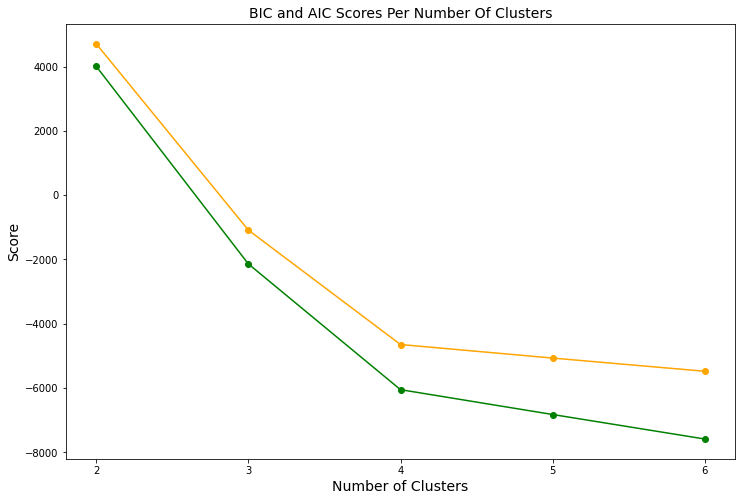

In [43]:
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_step, bic_score, '-o', color='orange')
ax.plot(n_step, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_step)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')

In [44]:
final_gm = mix_results['labels'][4]
final_gm

array([2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 3,
       0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1,
       1, 0, 2, 3, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 3, 0, 1, 2, 0, 2, 2,
       0, 2, 0, 3, 2, 2, 1, 3, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2,
       3, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 1, 1,
       3, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 3, 2, 1, 1, 1, 2,
       0, 1, 2, 1, 3, 1, 1, 2, 3, 2, 2, 2, 2, 0, 0, 1, 3, 0, 2, 2, 2, 2,
       1, 0, 2, 1, 2, 1, 2, 0, 2, 2, 3, 2, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0,
       1, 1, 0, 2, 2, 2, 3, 2, 0, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2,
       0, 1, 1, 1, 1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 3, 0, 0, 0, 2, 3, 1, 0,
       2, 1, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 2, 3, 1, 1, 0, 2, 0, 2, 1,
       1, 2, 1, 0, 0, 2, 1, 2, 2, 2, 2, 2, 3, 2, 0, 2, 1, 2, 1, 2, 2, 2,
       0, 0, 0, 0, 2, 1, 1, 2, 3, 1, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0, 3, 0,
       2, 0, 1, 0, 0, 2, 1, 2, 2, 3, 3, 2, 1, 1, 2,

In [45]:
g = final_gm
gdf = pd.DataFrame(data=g)
gdf.value_counts()

2    152
1     95
0     84
3     23
dtype: int64

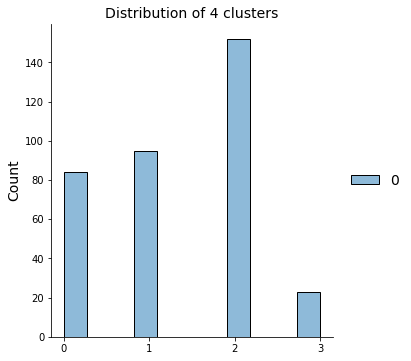

In [46]:
gx = sbn.displot(gdf).set(title='Distribution of 4 clusters')
gx.set(xticks=np.arange(0,4))

In [47]:
X_train['kmean_cluster'] = pd.DataFrame(final_kmeans)
X_train['gm_cluster'] = pd.DataFrame(final_gm)
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,kmean_cluster,gm_cluster
141,1.6,0.0,21.9,0.0,0.6,5.0,100.0,1.4,4.0,437.0,21.2,34.4,14.4,3.0,2.0
272,0.1,20.0,7.0,0.0,0.5,6.5,58.7,3.9,3.0,223.0,18.6,7.7,24.4,2.0,3.0
135,0.6,0.0,21.9,0.0,0.6,6.3,98.2,2.1,4.0,437.0,21.2,17.0,18.1,0.0,1.0
298,0.1,70.0,2.2,0.0,0.4,6.3,20.1,7.8,5.0,358.0,14.8,5.0,22.5,3.0,1.0
122,0.1,0.0,25.6,0.0,0.6,6.0,92.9,2.1,2.0,188.0,19.1,17.9,20.5,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.3,0.0,7.4,0.0,0.5,5.7,74.3,4.7,5.0,287.0,19.6,11.7,18.5,1.0,0.0
192,0.1,45.0,3.4,0.0,0.4,7.2,26.3,6.5,5.0,398.0,15.2,2.9,36.4,1.0,0.0
117,0.2,0.0,10.0,0.0,0.5,6.0,82.6,2.7,6.0,432.0,17.8,10.3,19.2,1.0,0.0
47,0.2,0.0,6.9,0.0,0.4,6.0,85.5,5.7,3.0,233.0,17.9,18.8,16.6,2.0,3.0


# Explanation of Results

* In our Gaussian Mixture model, we saw a clear elbow at 4 clusters, similar to our k-means solution. 
* We decided to move forward with 4 clusters to develop an apples-to-apples comparison, but also from a marketing standpoint, 4 clusters represents an ideal segmentation for customer targeting and clearly demarcates a strong delineation of segments

#Steps 8 and 9

#Comparing the Means and Interpreting the Clusters

#### Variables
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full value property tax rate per 10 thousand dollars
* PTRATIO - pupil-teacher ratio by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's


#### Interpretation
* Cluster 1
* Cluster 2
* Cluster 3 
* Cluster 4

In [ ]:
# Group the data by 'cluster' column
grouped_kmean = X_train.groupby('kmean_cluster')
grouped_gm = X_train.groupby('gm_cluster')

In [ ]:
f4_kmean = lambda x: x.mean() if np.issubdtype(x.dtype, np.number) else x.count()
X_train.groupby('kmean_cluster').agg(f4_kmean).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,gm_cluster
kmean_cluster,,,,,,,,,,,,,,
0.0,0.3,14.9,8.7,0.1,0.5,6.4,64.1,4.4,4.4,305.9,18.4,10.5,24.6,1.2
1.0,0.4,17.5,7.8,0.0,0.5,6.5,60.7,4.2,4.4,293.4,17.5,10.1,26.7,0.4
2.0,0.4,9.3,11.5,0.1,0.5,6.3,65.8,4.0,3.9,311.3,17.9,12.5,23.6,3.0
3.0,0.4,16.8,8.1,0.1,0.5,6.4,59.6,4.5,4.4,310.2,17.6,10.1,24.9,1.8


In [ ]:
f4_gm = lambda x: x.mean() if np.issubdtype(x.dtype, np.number) else x.count()
X_train.groupby('gm_cluster').agg(f4_gm).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,kmean_cluster
gm_cluster,,,,,,,,,,,,,,
0.0,0.5,17.0,7.3,0.0,0.5,6.5,60.7,4.1,4.6,295.1,17.5,10.6,26.6,1.0
1.0,0.3,19.5,7.8,0.1,0.5,6.4,58.5,4.7,4.3,305.7,18.1,10.3,24.6,0.8
2.0,0.4,14.6,8.8,0.1,0.5,6.4,62.9,4.4,4.4,307.3,17.7,10.0,25.2,2.5
3.0,0.4,9.3,11.5,0.1,0.5,6.3,65.8,4.0,3.9,311.3,17.9,12.5,23.6,2.0


#Other Comparative Metrics

In [ ]:
f2_kmean = lambda x: x.min() if np.issubdtype(x.dtype, np.number) else x.count()
X_train.groupby('kmean_cluster').agg(f2_kmean).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,gm_cluster
kmean_cluster,,,,,,,,,,,,,,
0.0,0.0,0.0,1.2,0.0,0.4,4.9,7.8,1.5,1.0,188.0,13.0,2.9,13.1,1.0
1.0,0.0,0.0,1.4,0.0,0.4,5.4,8.9,1.4,1.0,188.0,12.6,1.7,13.6,0.0
2.0,0.0,0.0,2.5,0.0,0.4,5.2,6.2,1.5,1.0,188.0,14.7,4.8,14.0,3.0
3.0,0.0,0.0,0.5,0.0,0.4,5.0,2.9,1.4,1.0,187.0,12.6,2.0,12.7,1.0


In [ ]:
f3_kmean = lambda x: x.max() if np.issubdtype(x.dtype, np.number) else x.count()
X_train.groupby('kmean_cluster').agg(f3_kmean).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,gm_cluster
kmean_cluster,,,,,,,,,,,,,,
0.0,2.4,95.0,25.6,1.0,0.9,8.0,100.0,8.8,8.0,437.0,21.2,29.5,50.0,2.0
1.0,2.7,95.0,25.6,1.0,0.9,8.4,100.0,9.2,8.0,432.0,21.0,29.6,50.0,2.0
2.0,2.3,90.0,25.6,1.0,0.9,7.2,95.6,7.3,8.0,437.0,21.2,28.3,37.9,3.0
3.0,4.1,100.0,25.6,1.0,0.9,8.7,100.0,12.1,8.0,437.0,21.2,34.4,50.0,2.0


In [ ]:
f1_kmean = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else x.count()
X_train.groupby('kmean_cluster').agg(f1_kmean).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,gm_cluster
kmean_cluster,,,,,,,,,,,,,,
0.0,0.1,0.0,6.2,0.0,0.5,6.3,66.3,3.8,4.0,294.5,18.5,9.5,22.6,1.0
1.0,0.2,0.0,6.0,0.0,0.5,6.4,65.2,4.0,4.0,293.0,17.8,9.5,23.8,0.0
2.0,0.1,0.0,10.6,0.0,0.5,6.2,66.5,3.7,4.0,289.0,17.8,8.8,23.4,3.0
3.0,0.1,0.0,6.2,0.0,0.5,6.2,59.6,4.4,4.0,304.0,17.9,8.6,22.9,2.0


In [ ]:
f5_kmean = lambda x: x.mode() if np.issubdtype(x.dtype, np.number) else x.count()
X_train.groupby('kmean_cluster').agg(f5_kmean).head()

,ZN,INDUS,CHAS,NOX,RAD,TAX,PTRATIO,gm_cluster
kmean_cluster,,,,,,,,
0.0,0.0,21.9,0.0,0.6,4.0,307.0,21.2,1.0
1.0,0.0,8.1,0.0,0.5,5.0,307.0,"[14.7, 21.0]",0.0
2.0,0.0,"[13.92, 19.58, 21.89]",0.0,"[0.437, 0.489, 0.624]",4.0,"[289.0, 403.0, 437.0]","[14.7, 16.0, 17.8, 18.6, 21.2]",3.0
3.0,0.0,19.6,0.0,0.5,5.0,307.0,14.7,2.0


In [ ]:
f1_gm = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else x.count()
X_train.groupby('gm_cluster').agg(f1_gm).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,kmean_cluster
gm_cluster,,,,,,,,,,,,,,
0.0,0.2,0.0,6.0,0.0,0.5,6.3,64.9,4.0,5.0,293.0,17.9,9.6,23.8,1.0
1.0,0.1,0.0,6.2,0.0,0.5,6.3,52.8,4.4,4.0,294.5,18.0,8.0,22.6,0.0
2.0,0.1,0.0,6.6,0.0,0.5,6.2,67.5,4.0,4.5,304.0,18.1,8.9,22.9,3.0
3.0,0.1,0.0,10.6,0.0,0.5,6.2,66.5,3.7,4.0,289.0,17.8,8.8,23.4,2.0


In [ ]:
f2_gm = lambda x: x.min() if np.issubdtype(x.dtype, np.number) else x.count()
X_train.groupby('gm_cluster').agg(f2_gm).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,kmean_cluster
gm_cluster,,,,,,,,,,,,,,
0.0,0.0,0.0,1.5,0.0,0.4,5.4,9.8,1.4,1.0,188.0,12.6,1.7,13.6,1.0
1.0,0.0,0.0,1.2,0.0,0.4,4.9,6.5,1.5,1.0,193.0,13.0,2.9,13.3,0.0
2.0,0.0,0.0,0.5,0.0,0.4,5.0,2.9,1.4,1.0,187.0,12.6,2.0,12.7,0.0
3.0,0.0,0.0,2.5,0.0,0.4,5.2,6.2,1.5,1.0,188.0,14.7,4.8,14.0,2.0


In [ ]:
f3_gm = lambda x: x.max() if np.issubdtype(x.dtype, np.number) else x.count()
X_train.groupby('gm_cluster').agg(f3_gm).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,kmean_cluster
gm_cluster,,,,,,,,,,,,,,
0.0,2.7,95.0,25.6,1.0,0.9,8.3,100.0,8.0,8.0,432.0,21.0,29.6,50.0,1.0
1.0,2.4,95.0,21.9,1.0,0.9,8.0,100.0,8.8,8.0,437.0,21.2,30.8,50.0,3.0
2.0,4.1,100.0,25.6,1.0,0.9,8.7,100.0,12.1,8.0,437.0,21.2,34.4,50.0,3.0
3.0,2.3,90.0,25.6,1.0,0.9,7.2,95.6,7.3,8.0,437.0,21.2,28.3,37.9,2.0


In [ ]:
f5_gm = lambda x: x.mode() if np.issubdtype(x.dtype, np.number) else x.count()
X_train.groupby('gm_cluster').agg(f5_gm).head()

,ZN,INDUS,CHAS,NOX,AGE,RAD,TAX,PTRATIO,MEDV,kmean_cluster
gm_cluster,,,,,,,,,,
0.0,0.0,8.1,0.0,0.5,100.0,5.0,307.0,21.0,23.1,1.0
1.0,0.0,21.9,0.0,0.6,"[53.6, 76.5, 98.2]",4.0,307.0,21.2,"[20.7, 21.2, 22.2, 22.5, 22.9, 24.5, 25.0, 34....",0.0
2.0,0.0,19.6,0.0,0.5,100.0,5.0,"[307.0, 403.0]",14.7,50.0,3.0
3.0,0.0,"[13.92, 19.58, 21.89]",0.0,"[0.437, 0.489, 0.624]","[6.2, 20.8, 31.1, 33.0, 51.0, 53.8, 54.4, 56.4...",4.0,"[289.0, 403.0, 437.0]","[14.7, 16.0, 17.8, 18.6, 21.2]","[14.0, 15.7, 16.6, 17.4, 17.8, 20.9, 21.7, 22....",2.0
